# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
#1
a = torch.FloatTensor([[0, 1,2,1],[0, 1,2,1],[0, 1,2,1]])
print(a.shape)
b = torch.FloatTensor([0,1,2,3,4,5,6,7,8,9,10,11])
print(b.shape)
#2
c = b.view(2,2,3)
print(c.shape)
#3
print(a[:,0])

torch.Size([3, 4])
torch.Size([12])
torch.Size([2, 2, 3])
tensor([0., 0., 0.])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
#1
a = torch.FloatTensor(5,2).zero_()
print(a.shape)
b = torch.FloatTensor([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
print(b.shape)
#2
c = b.view(5,2)
print(c.shape)
#3
print(a.add(c))
print(a.sub(c))
print(a.mul(c))
print(a.div(c))

torch.Size([5, 2])
torch.Size([1, 10])
torch.Size([5, 2])
tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])
tensor([[ -1.,  -2.],
        [ -3.,  -4.],
        [ -5.,  -6.],
        [ -7.,  -8.],
        [ -9., -10.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

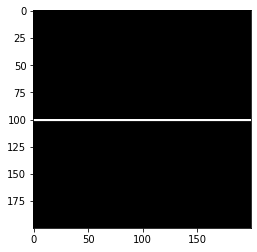

In [ ]:
#1
a = torch.IntTensor(100, 200, 200, 3).zero_()
#2
for i in range(a.shape[0]):
  a[i][2*i:2*i+2] = 255
plt.imshow(a[50])


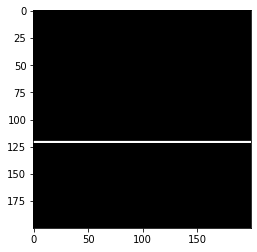

In [ ]:
plt.imshow(a[60])

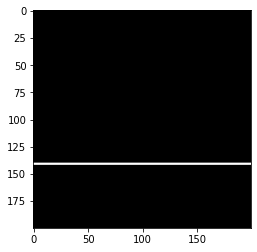

In [ ]:
plt.imshow(a[70])

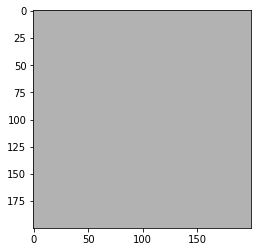

In [ ]:
#3
plt.imshow((a.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
import torch

In [ ]:
a = torch.FloatTensor(2, 3, 4).uniform_()
a = a.cuda()
print(a.is_cuda)
b = torch.FloatTensor(1, 8, 3).uniform_()
b = b.cuda()
print(b.is_cuda)

True
True


In [ ]:
c = b.reshape(a.shape)
a.size() == c.size()

True

In [ ]:
c = c.cpu()
a = a.cpu()

In [ ]:
from torch.autograd import Variable
a = Variable(a)
c = Variable(c, requires_grad= True)

In [ ]:
L = torch.mean((c - a)**2)
L.backward()

In [ ]:
c.grad

tensor([[[ 0.0252,  0.0296,  0.0742,  0.0617],
         [-0.0193, -0.0182, -0.0676, -0.0465],
         [ 0.0024, -0.0154, -0.0464,  0.0591]],

        [[-0.0008,  0.0294,  0.0252,  0.0126],
         [-0.0634, -0.0299,  0.0497,  0.0203],
         [-0.0698, -0.0156, -0.0115, -0.0198]]])